In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

In [17]:
assets = set(f.split('USD')[0] for f in os.listdir('data') if f.endswith('.csv') and 'USD' in f)

In [19]:
assets

{'BTA', 'GMMA', 'LMDA', 'ZTA'}

Collect and visualize data

In [21]:
trades = {}

for asset in assets:
    df_mkt = pd.read_csv(f'data/{asset}USD_md.csv', index_col=0)
    df_mkt.index = pd.to_datetime(df_mkt.index, unit = 'ms')
    df_mkt['mid'] = .5 * (df_mkt.ask + df_mkt.bid) 
    df_mkt['spread'] = df_mkt.ask - df_mkt.bid
    
    df_trades = pd.read_csv(f'data/{asset}USD_trades.csv', index_col=0)
    df_trades.index = pd.to_datetime(df_trades.index, unit = 'ms')
    df_trades.sort_index(inplace=True)
    

    df_trades_vs_mkt = pd.merge_asof(left = df_mkt,
                                     right= df_trades[['trade_id', 'side', 'size', 'px']],
                                     left_index = True,
                                     right_index=True,
                                     direction = 'backward'
                                     )
    
    trades[asset] = df_trades_vs_mkt

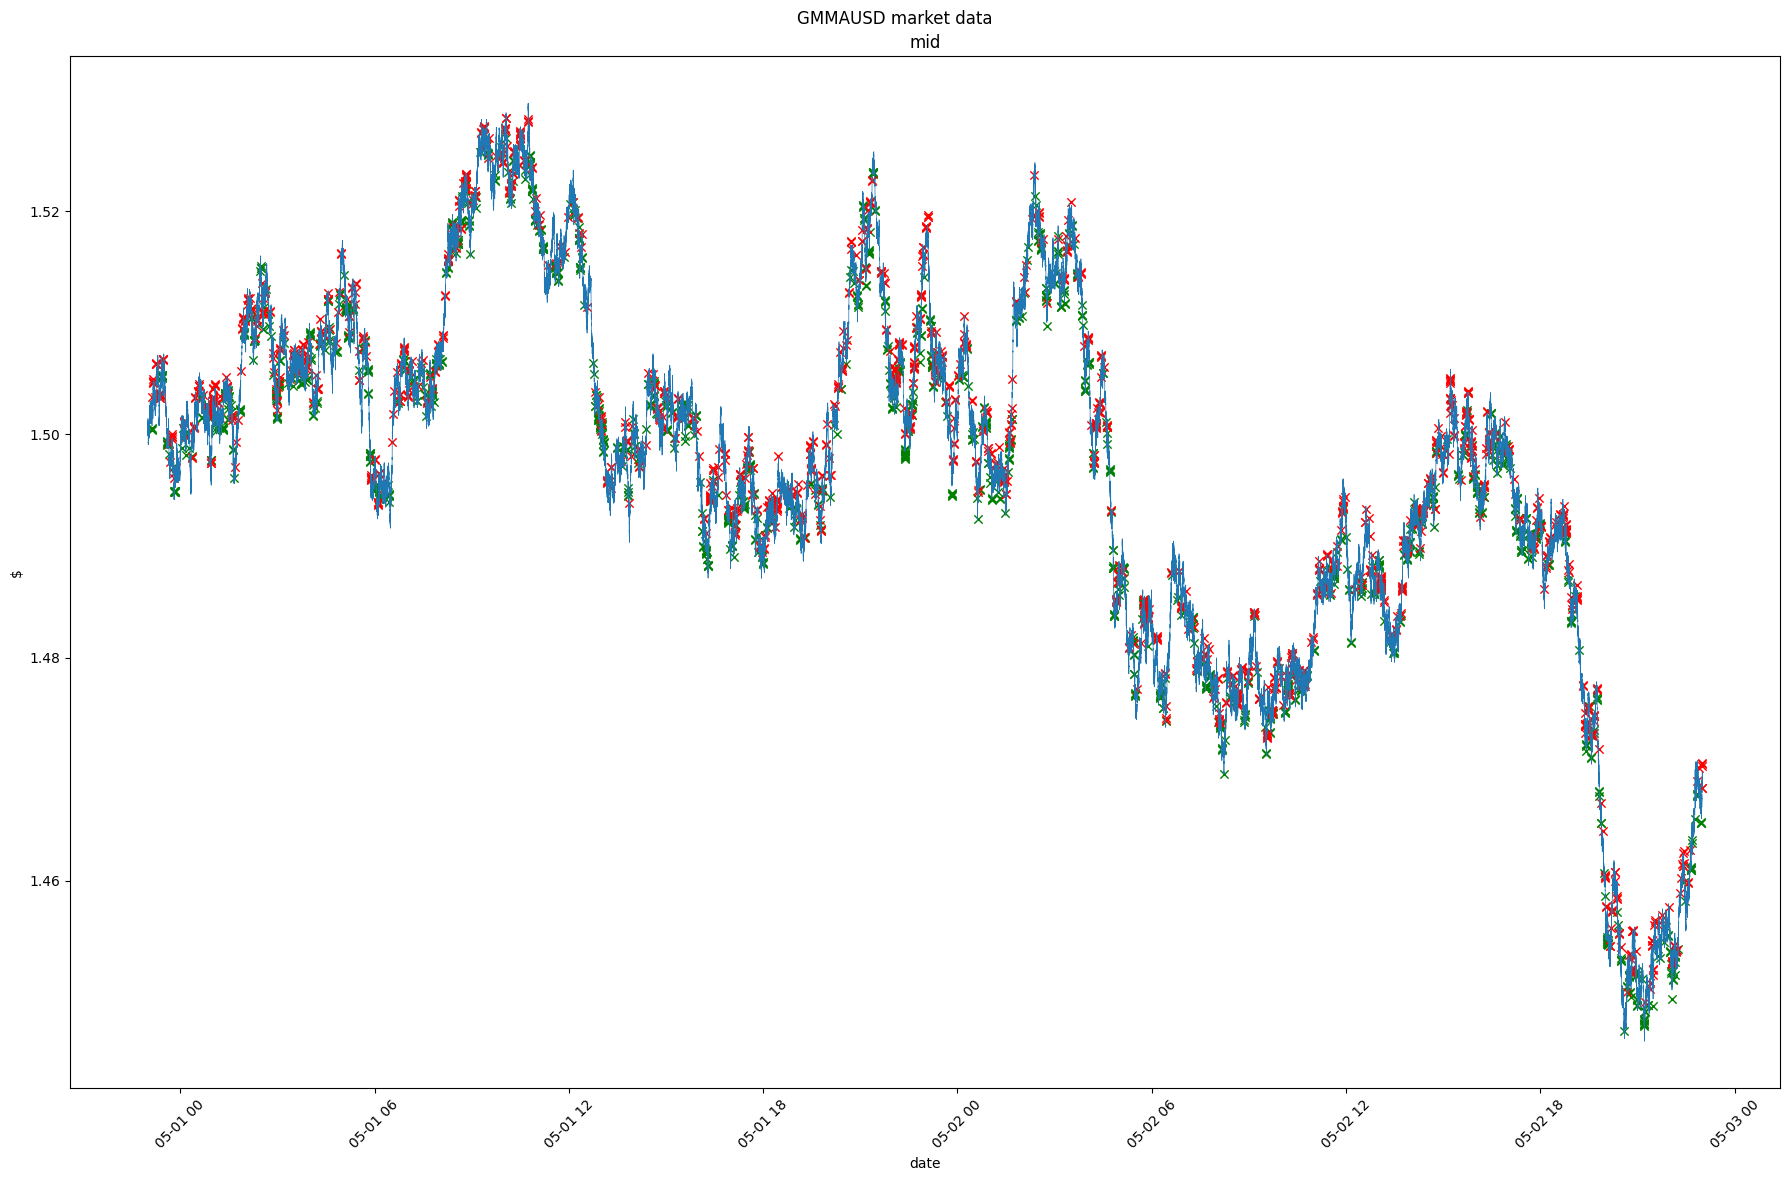

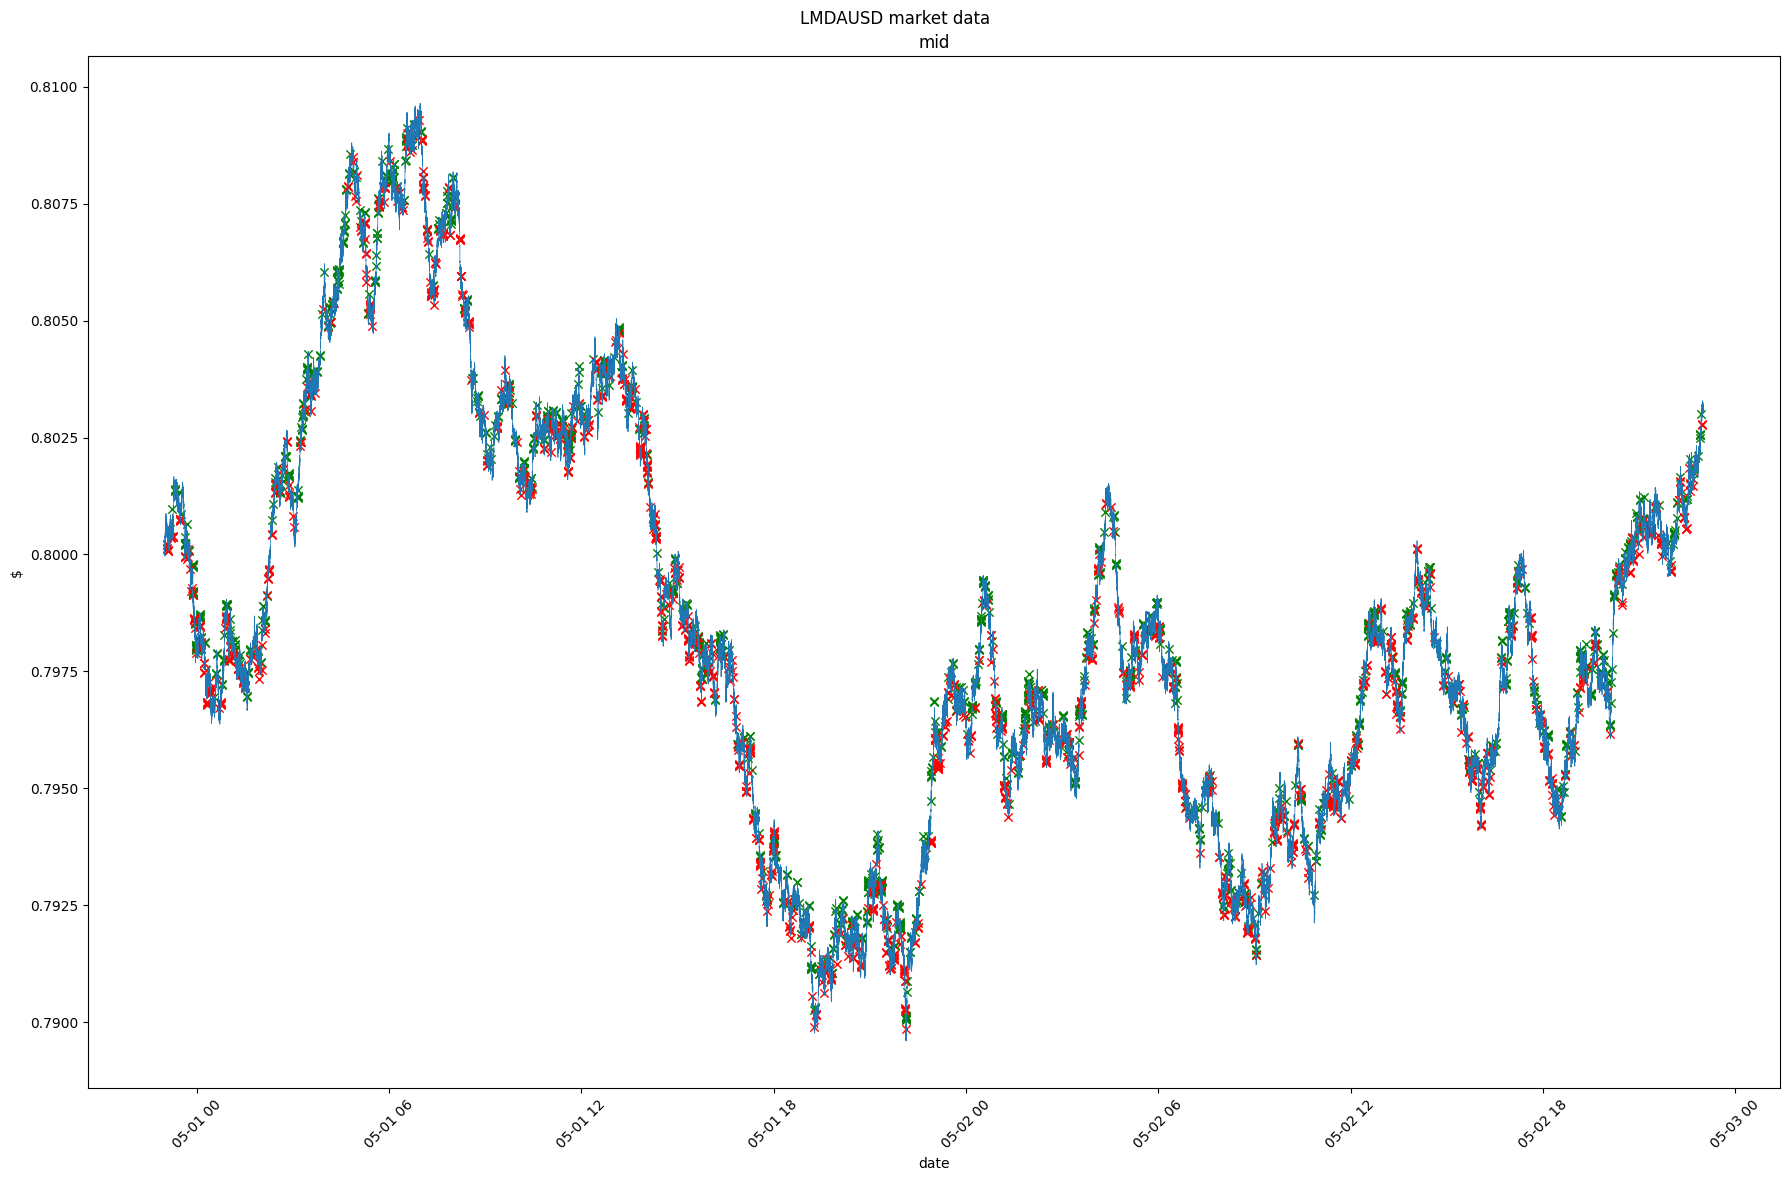

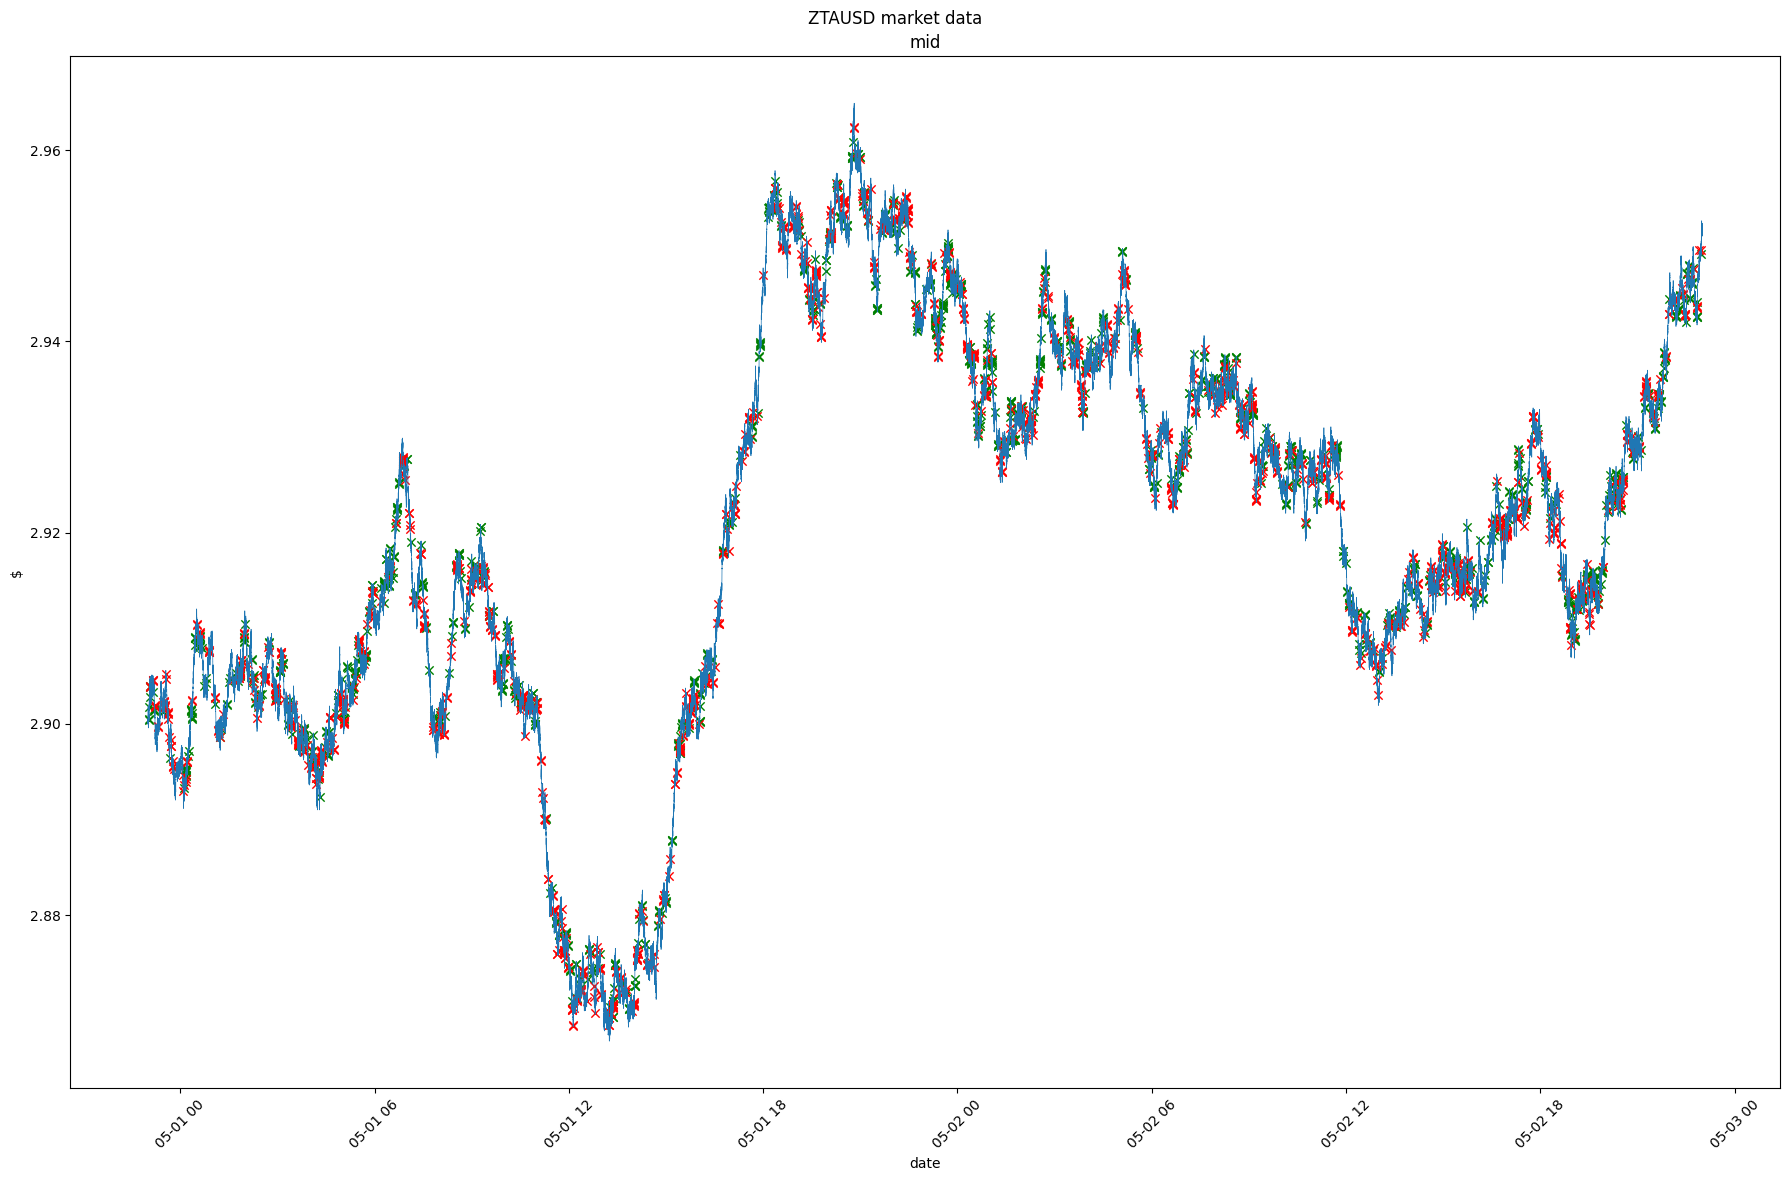

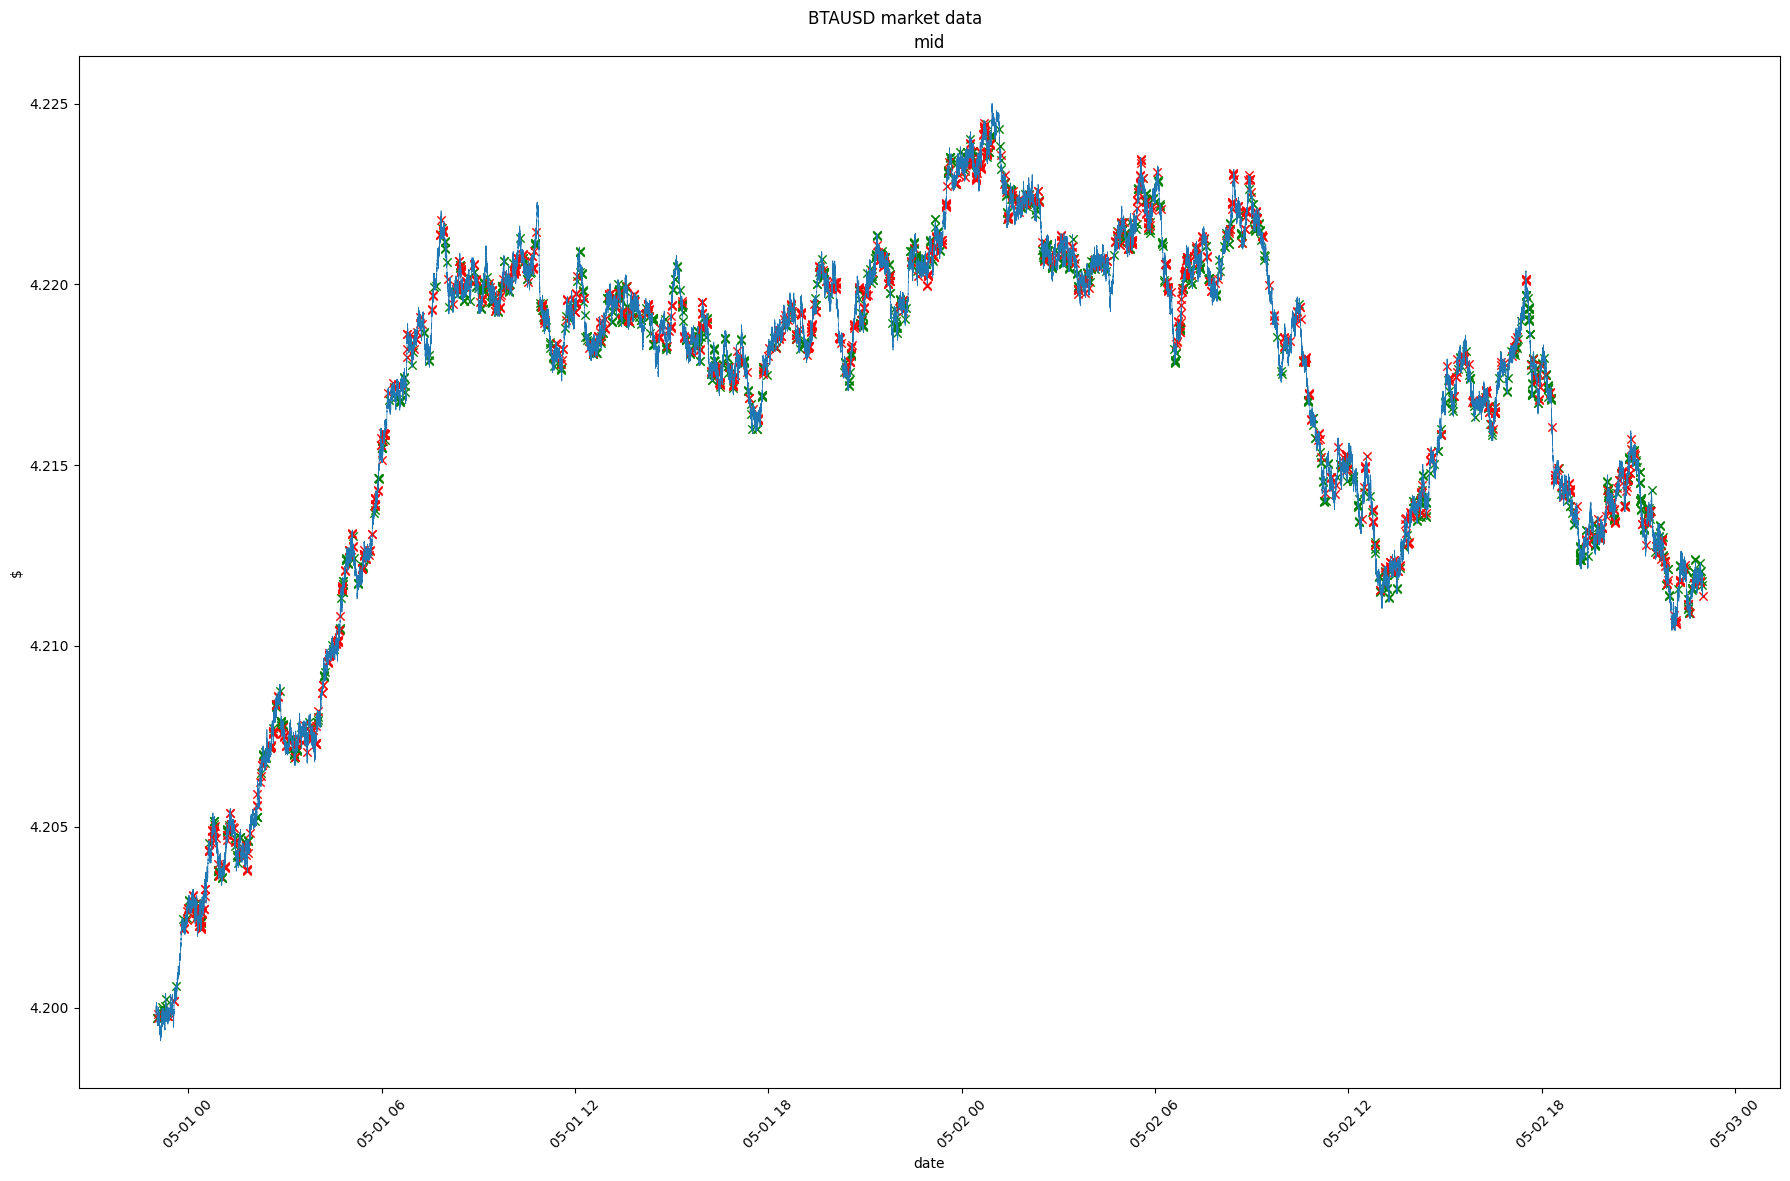

In [ ]:
for asset, df in trades.items():
    fig, axs = plt.subplots(figsize=(18, 12))
    

    axs.plot(df.index, df.mid, linewidth = .5)
    axs.set_title(f'mid')

    buys = df[df.side == 'B'].drop_duplicates('trade_id')
    sells = df[df.side == 'S'].drop_duplicates('trade_id')

    axs.scatter(buys.index, buys.px, color = 'green', marker = 'x',
                  label = 'buy', linewidth = 1)
    
    axs.scatter(sells.index, sells.px, color = 'red', marker = 'x',
                  label = 'sell', linewidth = 1)



    axs.set_ylabel('mid ($)')

    plt.xlabel('date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

BTA